#Libraries
###Only libraries needed for datascraping are pandas and json

In [ ]:
import pandas as pd
import json

#Dataset

In [ ]:
tmdb_cred = pd.read_csv('creds_tmdb.csv')
tmdb_movie = pd.read_csv('movie_tmdb.csv')

FileNotFoundError: ignored

#Data Visualization

### Visualize TMDB Credit

In [ ]:
tmdb_cred.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Visualize TMDB Movie

In [ ]:
tmdb_movie.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#Helper Functions

In [ ]:
def json_str_conv_movie(convertKey):
  tmdb_movie[convertKey] = tmdb_movie[convertKey].apply(json.loads)

  iterable = zip(tmdb_movie.index, tmdb_movie[convertKey])
  for fInd, element in iterable:
      indexKeyList = []

      elmSize = len(element)
      for innerIndex in range(0, elmSize):
          genre_elem = (element[innerIndex]['name']);
          indexKeyList.append(genre_elem)

      strOfList = str(indexKeyList)
      tmdb_movie.loc[fInd, convertKey] = strOfList

In [ ]:
def json_str_conv_cred(convertKey):
  tmdb_cred[convertKey] = tmdb_cred[convertKey].apply(json.loads)

  iterable = zip(tmdb_cred.index, tmdb_cred[convertKey])
  for fInd, element in iterable:
      indexKeyList = []

      elmSize = len(element)
      for innerIndex in range(0, elmSize):
          genre_elem = (element[innerIndex]['name']);
          indexKeyList.append(genre_elem)

      strOfList = str(indexKeyList)
      tmdb_cred.loc[fInd, convertKey] = strOfList

In [ ]:
def find_dir_crew(elementCp):
    for currElm in elementCp:
        if 'Director' == currElm['job']:
            crewName = currElm['name']
            return crewName

In [ ]:
def crewConv(convertKey, fromKey):
  tmdb_cred[convertKey] = tmdb_cred[convertKey].apply(json.loads)
  tmdb_cred[convertKey] = tmdb_cred[convertKey].apply(find_dir_crew)
  tmdb_cred.rename(columns={'crew':'director'},inplace=True)

#JSON to String Conversion

Convert Genre JSON

In [ ]:
json_str_conv_movie('genres')

Convert KeyWords JSON

In [ ]:
json_str_conv_movie('keywords')

Convert Production Companies JSON

In [ ]:
json_str_conv_movie('production_companies')

Convert Cast JSON

In [ ]:
json_str_conv_cred('cast')

Convert Crew JSON

In [ ]:
crewConv('crew', 'director')

#Display Scraped Data



###Credit Display

In [ ]:
tmdb_cred.iloc[0]

movie_id                                                19995
title                                                  Avatar
cast        ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...
director                                        James Cameron
Name: 0, dtype: object

###Movie Display

In [ ]:
tmdb_movie.iloc[0]

budget                                                          237000000
genres                  ['Action', 'Adventure', 'Fantasy', 'Science Fi...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                ['culture clash', 'future', 'space war', 'spac...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    ['Ingenious Film Partners', 'Twentieth Century...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

#Merge Movies and Credits

In [ ]:
leftCol = 'id'
rightCol = 'movie_id'

joinOn = 'left'
tmdb_movie_credits = tmdb_movie.merge(tmdb_cred, left_on=leftCol, right_on=rightCol, how=joinOn)

#Merged Movie Display

In [ ]:
tmdb_movie_credits.iloc[0]

budget                                                          237000000
genres                  ['Action', 'Adventure', 'Fantasy', 'Science Fi...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                ['culture clash', 'future', 'space war', 'spac...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    ['Ingenious Film Partners', 'Twentieth Century...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

#Movie Size

In [ ]:
tmdb_movie_credits.size


115272

#Columns

In [ ]:
tmdb_movie_credits.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'director'],
      dtype='object')

#Column Data Types

In [ ]:
tmdb_movie_credits.dtypes


budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
movie_id                  int64
title_y                  object
cast                     object
director                 object
dtype: object

#Dataframe to CSV

In [ ]:
tmdb_movie_credits.to_csv('clean_movie_credits_tmdb.csv')

#Filter Merged Movies

In [ ]:
filter_tmdb_movie_credits = tmdb_movie_credits[['id','original_title','genres','cast','vote_average','director','keywords']]

#Merged Movie Display

In [ ]:
filter_tmdb_movie_credits.iloc[0]

id                                                            19995
original_title                                               Avatar
genres            ['Action', 'Adventure', 'Fantasy', 'Science Fi...
cast              ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...
vote_average                                                    7.2
director                                              James Cameron
keywords          ['culture clash', 'future', 'space war', 'spac...
Name: 0, dtype: object

#Merged Movie Size

In [ ]:
filter_tmdb_movie_credits.size

33621

#Merged Movie Columns

In [ ]:
filter_tmdb_movie_credits.columns

Index(['id', 'original_title', 'genres', 'cast', 'vote_average', 'director',
       'keywords'],
      dtype='object')

#Merged Movie Data Types

In [ ]:
filter_tmdb_movie_credits.dtypes

id                  int64
original_title     object
genres             object
cast               object
vote_average      float64
director           object
keywords           object
dtype: object

#Dataframe to CSV

In [ ]:
filter_tmdb_movie_credits.to_csv('filtered_clean_movie_credits_tmdb.csv')

# Load Saved Movie and Credits datasets

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tmdb_movie_credits = pd.read_csv('clean_movie_credits_tmdb.csv')
filter_tmdb_movie_credits = pd.read_csv('filtered_clean_movie_credits_tmdb.csv')

In [ ]:
tmdb_movie_credits.columns

Index(['Unnamed: 0', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_x', 'vote_average', 'vote_count', 'movie_id', 'title_y', 'cast',
       'director'],
      dtype='object')

In [ ]:
tmdb_movie_credits.head()

,Unnamed: 0,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director
0,0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [ ]:
genreList = []
for index, row in tmdb_movie_credits.iterrows():
    genres = str(row["genres"])[2:-2]
    genres = genres.split("', '")    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)

In [ ]:
castList = []
for index, row in tmdb_movie_credits.iterrows():
    cast = str(row["cast"])[2:-2]
    cast = cast.split("', '")  
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [ ]:
directorList=[]
for i in tmdb_movie_credits['director']:
    if i not in directorList:
        directorList.append(i)

In [ ]:
words_list = []
for index, row in tmdb_movie_credits.iterrows():
    keywords = str(row["keywords"])[2:-2]
    keywords = keywords.split("', '")  
    
    for k in keywords:
        if k not in words_list:
            words_list.append(k)

In [ ]:
tmdb_movie_credits = pd.get_dummies(tmdb_movie_credits, columns=["original_language","status"], prefix=["language","status"])

In [ ]:
for genre in genreList:
  tmdb_movie_credits[genre] = np.where(genre in str(tmdb_movie_credits["genres"]), 1, 0)

In [ ]:
columns_numeric = ["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count"]

In [ ]:
language_categorical = ['language_af', 'language_ar',
       'language_cn', 'language_cs', 'language_da', 'language_de',
       'language_el', 'language_en', 'language_es', 'language_fa',
       'language_fr', 'language_he', 'language_hi', 'language_hu',
       'language_id', 'language_is', 'language_it', 'language_ja',
       'language_ko', 'language_ky', 'language_nb', 'language_nl',
       'language_no', 'language_pl', 'language_ps', 'language_pt',
       'language_ro', 'language_ru', 'language_sl', 'language_sv',
       'language_ta', 'language_te', 'language_th', 'language_tr',
       'language_vi', 'language_xx', 'language_zh',]

In [ ]:
genre_categorical = ['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama',
       'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance',
       'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary',
       'Foreign', 'TV Movie', '']

In [ ]:
pca_features_movies = tmdb_movie_credits[ columns_numeric + language_categorical + genre_categorical ]

# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot

In [ ]:
pca_features_movies_normalized = (pca_features_movies - pca_features_movies.mean()) / (pca_features_movies.std()+1)

In [ ]:
pca_features_movies_normalized["runtime"] = pca_features_movies_normalized["runtime"].fillna(0)

In [ ]:
pca = PCA(n_components=pca_features_movies_normalized.shape[1])
pca.fit(pca_features_movies_normalized)

PCA(n_components=64)

In [ ]:
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(pca_features_movies_normalized.columns))],
index=pca_features_movies_normalized.columns)
print(loadings)

                   PC0       PC1       PC2       PC3       PC4       PC5  \
budget        0.455748 -0.079330 -0.707000  0.371212 -0.345487 -0.168135   
popularity    0.455527 -0.132860  0.537686  0.612761  0.029034  0.330714   
revenue       0.511821 -0.152938 -0.203038 -0.545038  0.272145  0.549775   
runtime       0.222157  0.941889 -0.040922  0.069004  0.237821 -0.009446   
vote_average  0.097361  0.229273  0.251628 -0.304901 -0.862404  0.190291   
...                ...       ...       ...       ...       ...       ...   
Music        -0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
Documentary  -0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
Foreign      -0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
TV Movie     -0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   
             -0.000000  0.000000  0.000000 -0.000000 -0.000000  0.000000   

                   PC6       PC7       PC8       PC9  ...  PC54  PC55  PC56  \
budget  

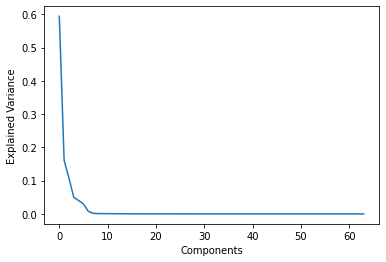

In [ ]:
plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

In [ ]:
num_features = 8

In [ ]:
pca = PCA(n_components = num_features)
pca.fit(pca_features_movies_normalized)

PCA(n_components=8)

In [ ]:
pca_transform = pca.transform(pca_features_movies_normalized)

In [ ]:
pca_transform.shape

(4803, 8)

In [ ]:
pd.DataFrame(pca_transform).to_csv('movie_pca_features.csv')

# K Nearest Neighbors Recommendation

In [ ]:
def binary(col_list):
    binaryList = []
    
    for genre in genreList:
        if genre in col_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [ ]:
# tmdb_movie_credits['genres_bin'] = tmdb_movie_credits['genres'].apply(lambda x: binary(x))
# tmdb_movie_credits['cast_bin'] = tmdb_movie_credits['cast'].apply(lambda x: binary(x))
# tmdb_movie_credits['director_bin'] = tmdb_movie_credits['director'].apply(lambda x: binary(x))

In [ ]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    # a = tmdb_movie_credits.iloc[movieId1]
    # b = tmdb_movie_credits.iloc[movieId2]

    pcaDistance = spatial.distance.cosine(pca_transform[movieId1], pca_transform[movieId2])
    # genresA = a['genres_bin']
    # genresB = b['genres_bin']
    
    # genreDistance = spatial.distance.cosine(genresA, genresB)
    
    # scoreA = a['cast_bin']
    # scoreB = b['cast_bin']
    # scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    # directA = a['director_bin']
    # directB = b['director_bin']
    # directDistance = spatial.distance.cosine(directA, directB)
    
    # wordsA = a['words_bin']
    # wordsB = b['words_bin']
    # wordsDistance = spatial.distance.cosine(directA, directB)
    return pcaDistance #+ genreDistance + directDistance + scoreDistance + wordsDistance

In [ ]:
new_id = list(range(0,tmdb_movie_credits.shape[0]))
tmdb_movie_credits['new_id']=new_id

In [ ]:
tmdb_movie_credits_recommendation = tmdb_movie_credits[['original_title','genres','vote_average','new_id','director']]

In [ ]:
import operator

In [ ]:
def getNeighbors(baseMovie, K):
    distances = []

    for index, movie in tmdb_movie_credits_recommendation.iterrows():
        if movie['new_id'] != baseMovie['new_id'].values[0]:
            dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
            distances.append((movie['new_id'], dist))

    distances.sort(key=operator.itemgetter(1))
    neighbors = []

    for x in range(K):
        neighbors.append(distances[x])
    return neighbors

In [ ]:
def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = tmdb_movie_credits_recommendation[tmdb_movie_credits_recommendation['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+tmdb_movie_credits.iloc[neighbor[0]][2]  
        print( tmdb_movie_credits.iloc[neighbor[0]][0]+" | Genres: "+str(tmdb_movie_credits.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(tmdb_movie_credits.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [ ]:
predict_score('Godfather')

Selected Movie:  The Godfather: Part III

Recommended Movies: 



TypeError: ignored

# Process all recommended movies for each movie

In [ ]:
recommended_movies = []
for index, movie in tmdb_movie_credits_recommendation.iterrows():
  name = movie["original_title"]
  new_movie = tmdb_movie_credits_recommendation[tmdb_movie_credits_recommendation['original_title'].str.contains(name)].iloc[0].to_frame().T
  
  K = 10
  avgRating = 0
  neighbors = getNeighbors(new_movie, K)
  names = []
  genres = []
  ratings = []
  for neighbor in neighbors:
      avgRating = avgRating+tmdb_movie_credits.iloc[neighbor[0]][2]  
      names.append(tmdb_movie_credits.iloc[neighbor[0]][0])
      genres.append(str(tmdb_movie_credits.iloc[neighbor[0]][1]).strip('[]').replace(' ',''))
      ratings.append(str(tmdb_movie_credits.iloc[neighbor[0]][2]))
    

  recommended_movies.append([new_movie['original_title'].item()] + names + genres + ratings + [avgRating / K, float(new_movie['vote_average'])])

recommendations_dataframe = pd.DataFrame(recommended_movies)
col_names = [f'Recommend Name {i}' for i in range(K)]
col_genres = [f'Recommend Genres{i}' for i in range(K)]
col_ratings = [f'Recommend Rating{i}' for i in range(K)]
recommendations_dataframe.columns =['Name'] + col_names + col_genres + col_ratings + ['Predicted Rating', 'Actual Rating']

TypeError: ignored

In [ ]:
recommendations_dataframe.head()

NameError: ignored

In [ ]:
recommendations_dataframe.to_csv('recommendations.csv')

NameError: ignored

# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(pca_features_movies_normalized)
print(len(kmeans.labels_))
print(type(kmeans.labels_))
kmeans.labels_

4803
<class 'numpy.ndarray'>


array([4, 4, 4, ..., 9, 3, 3], dtype=int32)

In [ ]:
within_cluster_sum_of_squares = []
k_values = []
for number_of_clusters in range(1, 20):
  k_values.append(number_of_clusters)
  kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
  kmeans.fit(pca_features_movies_normalized)
  within_cluster_sum_of_squares.append(kmeans.inertia_)


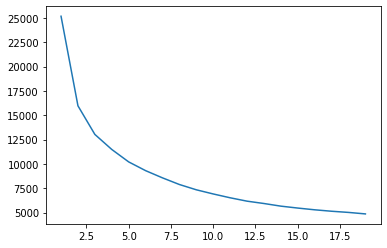

In [ ]:
plot.plot(k_values, within_cluster_sum_of_squares)

In [ ]:
kmeans_labels_dict = {}
for index, movie in tmdb_movie_credits_recommendation.iterrows():
  name = movie["original_title"]
  kmeans_labels_dict[name] = kmeans.labels_[index]

In [ ]:
print(kmeans_labels_dict)

{'Avatar': 4, "Pirates of the Caribbean: At World's End": 4, 'Spectre': 4, 'The Dark Knight Rises': 4, 'John Carter': 1, 'Spider-Man 3': 4, 'Tangled': 1, 'Avengers: Age of Ultron': 4, 'Harry Potter and the Half-Blood Prince': 4, 'Batman v Superman: Dawn of Justice': 4, 'Superman Returns': 1, 'Quantum of Solace': 1, "Pirates of the Caribbean: Dead Man's Chest": 4, 'The Lone Ranger': 1, 'Man of Steel': 4, 'The Chronicles of Narnia: Prince Caspian': 1, 'The Avengers': 4, 'Pirates of the Caribbean: On Stranger Tides': 4, 'Men in Black 3': 1, 'The Hobbit: The Battle of the Five Armies': 4, 'The Amazing Spider-Man': 4, 'Robin Hood': 1, 'The Hobbit: The Desolation of Smaug': 4, 'The Golden Compass': 1, 'King Kong': 1, 'Titanic': 4, 'Captain America: Civil War': 4, 'Battleship': 1, 'Jurassic World': 5, 'Skyfall': 4, 'Spider-Man 2': 4, 'Iron Man 3': 4, 'Alice in Wonderland': 4, 'X-Men: The Last Stand': 1, 'Monsters University': 4, 'Transformers: Revenge of the Fallen': 1, 'Transformers: Age of 

In [ ]:
kmeans_df = pd.DataFrame.from_dict(kmeans_labels_dict, orient='index')
kmeans_df.head()

,0
Avatar,4
Pirates of the Caribbean: At World's End,4
Spectre,4
The Dark Knight Rises,4
John Carter,1


In [ ]:
kmeans_df.to_csv('kmeans_cluster_labels.csv')